In [1]:
from specstan.dataset import TwinsEmbeddingDataset
from specstan.embedding import Embedding

In [2]:
TED = TwinsEmbeddingDataset("../SNfactory/global-diff-rbtl-params.txt", "../SNfactory/rbtl-dispertion.txt", "../SNfactory/spectra")

203
203


In [3]:
WAVELENGTHS, FLUXES, FLUX_ERRS = TED.get_spectra(apply_noise_mask=True)

In [4]:
EMBEDDING = Embedding(
    FLUXES, 
    num_components=3, 
    magnitude_residuals=TED.get_sne_param("delta_m", apply_noise_mask=True), 
    extinction_coefficients=TED.get_sne_param("delta_av", apply_noise_mask=True),
    mean_spectrum=TED.get_mean_spectrum(),
    algorithm_kwargs={"n_neighbors": 30, "min_dist": 0.1, "random_state": 42},
    gp_mask=TED.get_residuals_mask(),
    n_jobs=1
)

In [5]:
EMBEDDING.fit_gp_magnitude_residuals()

GP magnitude residuals fit:
    Fit result:           CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
    intrinsic_dispersion      0.158 ± 0.011
    gp_kernel_amplitude       0.158 ± 0.080
    gp_length_scale           2.376 ± 1.795
    offset                    -0.123 ± 0.129
    covariate_slope_0         -0.056 ± 0.080
    Fit NMAD                  0.108 mag
    Fit std                   0.173 mag


(0.10820406712297329, 0.17276544303177824)

In [6]:
print(EMBEDDING.get_gp_residuals_stats(), EMBEDDING.get_rbtl_residuals_stats())

(0.10820406712297329, 0.17276544303177824) (0.11564279999999999, 0.19456818596805997)


In [7]:
print(EMBEDDING.manifold_gp.residuals.shape)

(173,)


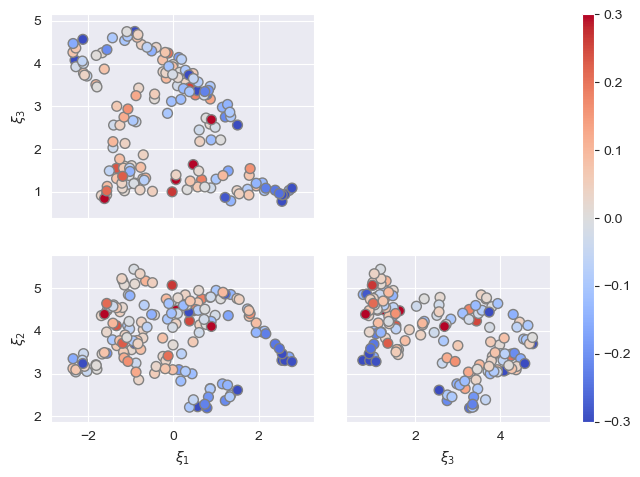

In [8]:
EMBEDDING.plot("./figures/refactor-plots/test-embedding.png")

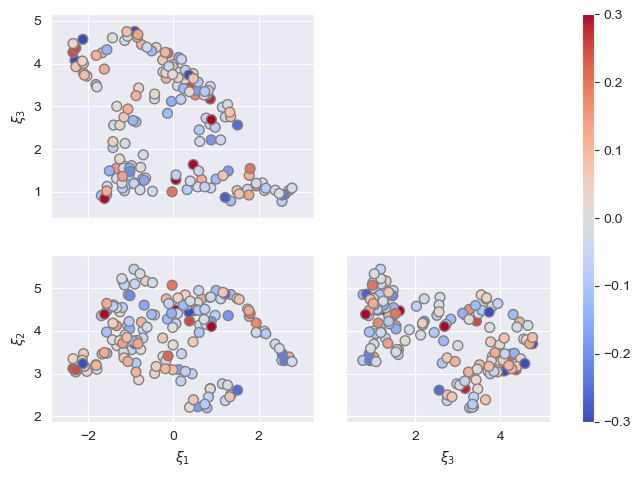

In [9]:
EMBEDDING.plot("./figures/refactor-plots/test-embedding-gp-corrected.png", gp_corrected=True)